<!--NOTEBOOK_HEADER-->
*This notebook contains material from [cbe67701-uncertainty-quantification](https://ndcbe.github.io/cbe67701-uncertainty-quantification);
content is available [on Github](https://github.com/ndcbe/cbe67701-uncertainty-quantification.git).*

<!--NAVIGATION-->
< [10.2 A simple example of Bayesian quadrature](https://ndcbe.github.io/cbe67701-uncertainty-quantification/10.02-Bayesian-quadrature.html) | [Contents](toc.html) | [11.0 Predictive Models Informed by Simulation, Measurement, and Surrogates](https://ndcbe.github.io/cbe67701-uncertainty-quantification/11.00-Predictive-Models-Informed-by-Simulation-Measurement-and-Surrogates.html)<p><a href="https://colab.research.google.com/github/ndcbe/cbe67701-uncertainty-quantification/blob/master/docs/10.03-Gaussian-Process-Regression.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://ndcbe.github.io/cbe67701-uncertainty-quantification/10.03-Gaussian-Process-Regression.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>

# 10.3 **Using scikit-learn for Gaussian Process Regression**

Created by Nilay Kumar 

The following resources were used for preparing this notebook:
1. https://www.youtube.com/channel/UCcAtD_VYwcYwVbTdvArsm7w
2. Dr. Juan Camilo Orduz, An Introduction to Gaussian Process Regression, https://juanitorduz.github.io/gaussian_process_reg/
3. Hilarie Sit, Quick Start to Gaussian Process Regression, https://towardsdatascience.com/quick-start-to-gaussian-process-regression-36d838810319




## 10.3.1 **Objectives**

1. A mathematical understanding of how gaussian process regression model is built. The set of equations also highlight how Bayesian Linear Regression is just a special case of Gaussian Process Regression.
2. Using scikit lear to fit a GPR model to data points generated from the mathematical function $y = sin(4\pi x) + sin(7\pi x)$

## 10.3.2 **Mathematical overview**

**1. Definition of Bayesian Linear Regression Models**

Given a dataset $D$,

$D = [(x_{1},y_{1}), (x_{2},y_{2}),.......,{x_{n},y_{n}}], x_{i} \in R^{d}, y_{i} \in R$ 

One can simply describe as bayesian linear regression model on the dataset as 

$Y_{i} = w^{T} x + \epsilon _{i}$

where, $w$ is a prior and can be approximated as $ w ~ N(0, \nu I)$ and $\epsilon$ is the noise defined using a gaussian with mean o and variance $\sigma^2$

**2. $z = x^{T} w$ is a Gaussian Process!**

$
 \begin{pmatrix}
  z_{x_{1}} \\
  z_{x_{2}} \\
  \vdots  \\
  z_{x_{n}} 
 \end{pmatrix} = $ $
 \begin{pmatrix}
  x_{1}^T w \\
  x_{2}^Tw \\
  \vdots  \\
  x_{n}^Tw 
 \end{pmatrix} = $$
 \begin{pmatrix}
  \cdots & x_{1}^T & \cdots \\
  \cdots & x_{2}^T & \cdots \\
  \vdots  \\
  \cdots & x_{n}^T & \cdots 
 \end{pmatrix} w $ $= Aw$ 

 A is the design matrix of a linear regression. Since w, the prior for 
 the bayesian regression model is normally distributed. Hence, by $Affine$ $property$ of  multivariate gaussian $Aw$ is also a Gausiisn.

 **Mean and Covariance of $z = x^{T} w$**

 $\mu (z) = E(z_{z}) = E(x^{T} w)= x^{T} E(w) = 0$

 $K(z,z') = cov(z_{x},z_{x}') = E(z_{x}z_{x}') - E(z_{x})E(z_{x}') = x^{T}E(ww^{T})x'^{T} = \nu x^{T}x'^{T}$ 


**3. Estimationg conditional distribution for inference using a Gaussian Process Model**

A gaussian process model can be defined as

$Y_{i} = Z_{x_{i}} + \epsilon _{i}$ ,  where

$Z = N(\mu, K)$, $\epsilon = N(0, \sigma ^2)$

Hence, $Y = N(\mu, K + \sigma ^2 I)$

Let $a = (1,\cdots  \cdots, l)$ and $a = (l+1,\cdots  \cdots, n)$ be the indices for the variables in training and test dataset

$ Y = 
 \begin{pmatrix}
  Y_{a} \\
  Y_{b} \\ 
 \end{pmatrix} , $
 $ Y_{a} = 
 \begin{pmatrix}
  Y_{1} \\
  \vdots \\
  Y_{l} \\ 
 \end{pmatrix} , $ 
 $ Y_{b} = 
 \begin{pmatrix}
  Y_{l+1} \\
  \vdots \\
  Y_{n} \\ 
 \end{pmatrix}  $


 $ C = 
 \begin{pmatrix}
  C_{aa} && C_{ab} \\
  C_{ba} && C_{bb}\\ 
 \end{pmatrix} , $ 
 $C_{ab} = K_{ab}$, $C_{aa} = K_{aa} + \sigma ^2 I$

 Here K is the kernel function used to define the covariance matrix.With little efforts, it can be easily shown that the conditional distribution $P(Y_{a} | Y_{b} = y_{b})$ is normally distributed.

 $P(Y_{a} | Y_{b} = y_{b}) = N(n,D)$, where

 $m = \mu _{a} + C_{ab}C_{bb}^{-1}(y_{b} - \mu _{b})$

 $D = C_{aa} + C_{ab}C_{bb}^{-1}C_{ba} $



**4. Summary for Gausian Process Regression**

$Input: (x_{1},\cdots,x_{l},x_{l+1},\cdots,x_{n})$

$Response:(y_{1},\cdots,y_{l},y_{l+1},\cdots,y_{n})$

$GP: \hat{Z} = (Z_{x_{1}}, \cdots, Z_{x_{n}})$

**Model**

$Y_{i} = Z_{x_{i}} + \epsilon _{i}$ ,  where

$Z_{x} = GP(\mu, K)$, $\epsilon = N(0, \sigma ^2 I)$

**Inference**

$P(y_{a}|y_{b}) = N(y_{a}|m,D)$

## 10.3.3 **Import libraries**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## 10.3.4 **Generate training data**
$y = sin(4\pi x) + sin(7\pi x)$

In [2]:
"""
This section of code generates training data for fitting the Gaussian Process Regression model

Variables declared:
x_end: The length till which x's need to be sampled
num_train: It denotes the number of training points that needs to be extracted within the define interval
sigma_noise: It is the standard deviation of the normal distribution from which random numbers are sampled

"""

# sampling points along x
x_end = 2
num_train = 200
x = np.linspace(start=0, stop=x_end, num=num_train)

# Defining function f(x) = sin(4*pi*x) + sin(7*pi*x)
def f(x):
    f = np.sin((4*np.pi)*x) + np.sin((7*np.pi)*x)
    return(f)

# Stroring the functional evaluations at x sampled
f_x = f(x)

# Adding noise to the functional evaluations
sigma_noise = 0.4
error_train = np.random.normal(loc=0, scale=sigma_noise, size=num_train)
y_train = f_x + error_train


## 10.3.5 **Visualizing the training data**

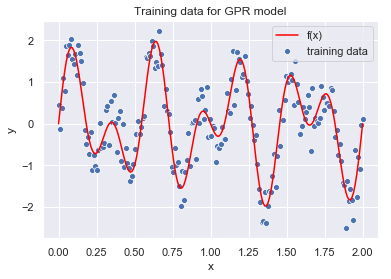

In [3]:
fig, ax = plt.subplots()
# Plot data points with added noise
sns.scatterplot(x=x, y=y_train, label='training data', ax=ax);
# Plot function.
sns.lineplot(x=x, y=f_x, color='red', label='f(x)', ax=ax);
ax.set(title='Training data for GPR model')
ax.legend(loc='upper right');
ax.set(xlabel='x', ylabel='y')
plt.show()

## 10.3.6 **Define test data**

In [4]:
num_test = num_train + 300
x_test = np.linspace(start=0, stop=(x_end + 1), num=num_test)

## 10.3.7 **scikit-learn example**

### 10.3.7.1 Step 1: Loading libraries for defining kernel and gaussian process regression model

In [5]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF


### 10.3.7.2 Step 2: Reshaping the data according to the dimensionality of the problem



In [6]:
"""
This section of the code rfeshapes the training data so as to be used by scikit-learns's
Gaussion Process Regressor object

Variables:
d: dimensionality of the problem (1 in this case)
"""
d = 1; 
# Reshaping training dataset
X_train = x.reshape(num_train, d)
# Reshaping test dataset
X_test = x_test.reshape(num_test,d)

### 10.3.7.3 Step 3: Defining the kernel and GPR model

For this example problem we choose a squared exponential kernel function defined by

$K(x_{p},x_{q}) = \sigma _{f}exp(-\frac{1}{2l^{2}} ||x_{p} - x_{q} ||^2)$

where $\sigma _{f}$ and $l$ are the hyperparameters of the kernel function.

In [7]:
"""
The part of code is used to describe the type of kernel used and the gaussian process regression model

1. Definition of kernel:

kernel = ConstantKernel(constant_value=sigma_f, constant_value_bounds=(1e-2, 1e2)) \
              * RBF(length_scale=l, length_scale_bounds=(1e-2, 1e2))

a. RBF kenel has been used for this problem.
b. Hyperparameter definitions:
    (i) sigma_f: defines the amplitude of the kernel function
    (ii) l: the locality parameter; used to define how far each point is able to interacts
c. The hyperparameter are best chosen so as to minimise the marginal log likelihood

2. Definition of gp model

gp = GaussianProcessRegressor(kernel=kernel, alpha=sigma_n**2, n_restarts_optimizer=10, )

a. Parameter definitions
    (i) sigma_n: It is the value added to the diagonal elements of defined  kernel matrix. Larger values mean a 
        larger value of noise in the data
    (ii) The number of restarts of the optimizer for finding the kernel’s parameters which maximize the 
        log-marginal likelihood

3. Output of the code is the gp model and the predictions on the test data

"""

# Initial values of l, sigma_f and sigma_n needs to be defined.
# Other inputs are the training and test datasets that need to be input

def gpPrediction( l, sigma_f, sigma_n , X_train, y_train, X_test):
  # Kernel definition 
  kernel = ConstantKernel(constant_value=sigma_f, constant_value_bounds=(1e-2, 1e2)) \
              * RBF(length_scale=l, length_scale_bounds=(1e-2, 1e2))
  # GP model 
  gp = GaussianProcessRegressor(kernel=kernel, alpha=sigma_n**2, n_restarts_optimizer=10, )
  # Fitting in the gp model
  gp.fit(X_train, y_train)
  # Make the prediction on test set.
  y_pred = gp.predict(X_test)
  return y_pred, gp;

### 10.3.7.4 Step 4: Calling in the defined GP model for making predictions on the test dataset

In [8]:
"""
l_init and sigma_f init are the initial values of the hyperparameters l and sigma_f of the kernel function

"""

l_init = 1
sigma_f_init = 3
sigma_n = 1

y_pred, gp = gpPrediction( l_init, sigma_f_init, sigma_n , X_train, y_train, X_test)

### 10.3.7.5 Step 5: Estimating credible intervals

In [9]:
# Generate samples from posterior distribution. 
y_hat_samples = gp.sample_y(X_test, n_samples=num_test)
# Compute the mean of the sample. 
y_hat = np.apply_over_axes(func=np.mean, a=y_hat_samples, axes=1).squeeze()
# Compute the standard deviation of the sample. 
y_hat_sd = np.apply_over_axes(func=np.std, a=y_hat_samples, axes=1).squeeze()

### 10.3.7.6 Step 6: Visualizating results

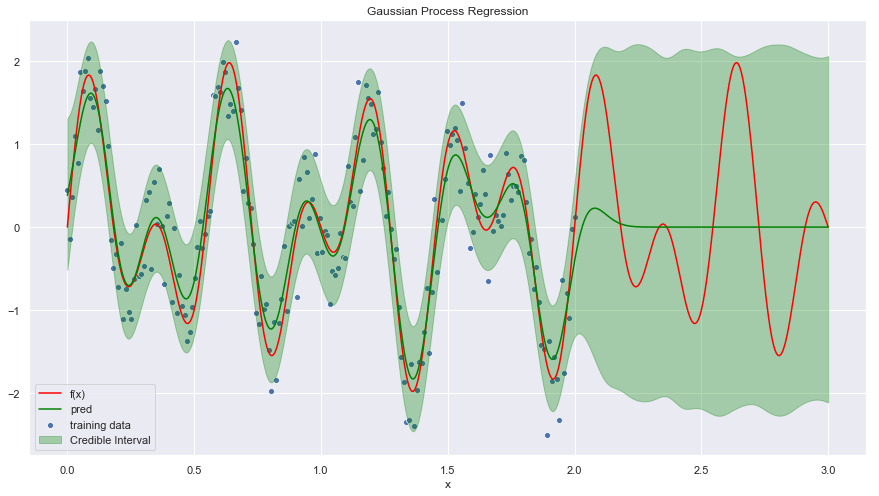

In [10]:
"""
This portion of the code is used to visualize the preductions made by gp model on the test datase. 
Cridible intervals for the predictions has also been plotted and indicated through the tranparent green corridor
"""

fig, ax = plt.subplots(figsize=(15, 8))
# Plotting the training data.
sns.scatterplot(x=x, y=y_train, label='training data', ax=ax);
# Plot the functional evaluation
sns.lineplot(x=x_test, y=f(x_test), color='red', label='f(x)', ax=ax)
# Plot corridor. 
ax.fill_between(x=x_test, y1=(y_hat - 2*y_hat_sd), y2=(y_hat + 2*y_hat_sd), color='green',alpha=0.3, label='Credible Interval')
# Plot prediction. 
sns.lineplot(x=x_test, y=y_pred, color='green', label='pred')

# Labeling axes
ax.set(title='Gaussian Process Regression')
ax.legend(loc='lower left');
ax.set(xlabel='x', ylabel='')
plt.show()

<!--NAVIGATION-->
< [10.2 A simple example of Bayesian quadrature](https://ndcbe.github.io/cbe67701-uncertainty-quantification/10.02-Bayesian-quadrature.html) | [Contents](toc.html) | [11.0 Predictive Models Informed by Simulation, Measurement, and Surrogates](https://ndcbe.github.io/cbe67701-uncertainty-quantification/11.00-Predictive-Models-Informed-by-Simulation-Measurement-and-Surrogates.html)<p><a href="https://colab.research.google.com/github/ndcbe/cbe67701-uncertainty-quantification/blob/master/docs/10.03-Gaussian-Process-Regression.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://ndcbe.github.io/cbe67701-uncertainty-quantification/10.03-Gaussian-Process-Regression.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>